<a href="https://colab.research.google.com/github/swastikbanerjee/AML_Lab/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [140]:
pip install ucimlrepo

Importing Dataset

In [141]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)

{'uci_id': 544, 'name': 'Estimation of obesity levels based on eating habits and physical condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [142]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [143]:
y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


No missing values in dataset

In [144]:
X.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [145]:
X.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

Encoding categorical variables using one-hot encoding

In [146]:
X_encoded = pd.get_dummies(X, columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'])

In [147]:
X_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0


KMeans Clustering with 3 clusters using Age & Height as attributes

In [148]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X[['Age','Height']])
X['cluster_number'] = kmeans.labels_
X.head()
#K-means assumes that the data is continuous

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_number
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,0


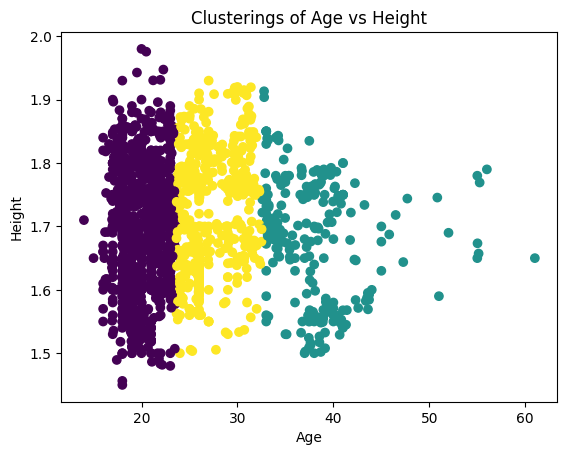

In [149]:
plt.scatter(x=X['Age'],y=X['Height'],c=X['cluster_number']) #The c parameter in plt.scatter is used to specify the color of each point based on the cluster to which it belongs.
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Clusterings of Age vs Height")
plt.show()

KMeans Clustering with 3 clusters using Height & Weight as attributes

In [150]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X[['Height','Weight']])
X['cluster_number'] = kmeans.labels_
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_number
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,2
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,2


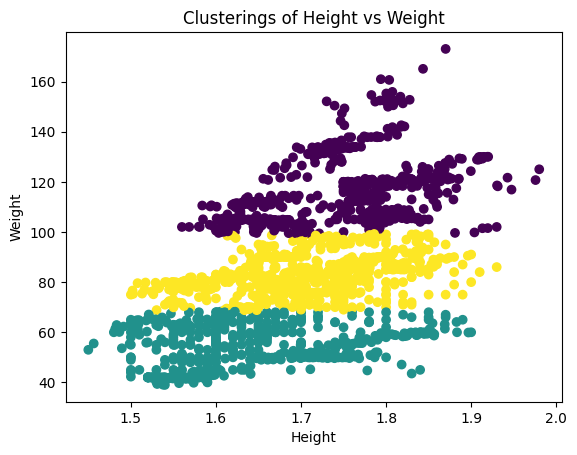

In [151]:
plt.scatter(x=X['Height'],y=X['Weight'],c=X['cluster_number'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Clusterings of Height vs Weight")
plt.show()

In [152]:
X.drop(['cluster_number'],axis=1,inplace=True)

KMeans Clustering with 1 to 5 clusters using Age & Weight as attributes

In [153]:
for k in range(1,6):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(X[['Age','Weight']])
  X[f'KMeans_{k}'] = kmeans.labels_

In [154]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,no,0.0,1.0,no,Public_Transportation,0,0,1,2,4
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.0,0.0,Sometimes,Public_Transportation,0,0,1,2,2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,no,2.0,1.0,Frequently,Public_Transportation,0,0,0,0,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,no,2.0,0.0,Frequently,Walking,0,0,0,0,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Public_Transportation,0,0,0,0,0


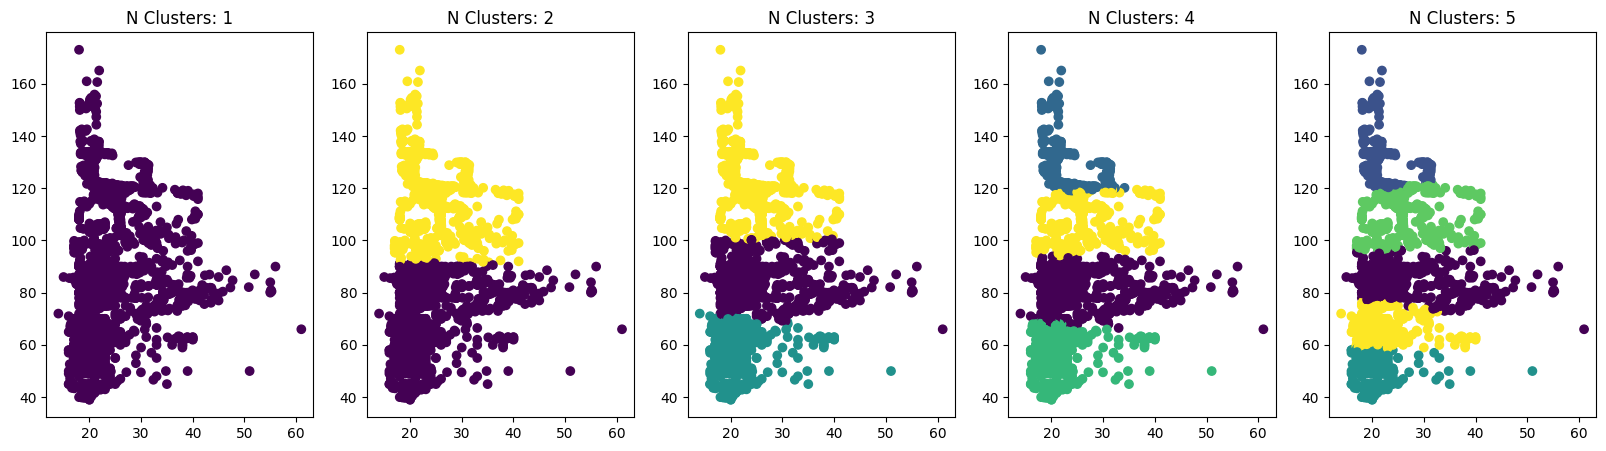

In [155]:
fig, axs=plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
  ax.scatter(x=X['Age'],y=X['Weight'],c=X[f'KMeans_{i}'])
  # ax.set_ylim(2,4.5)
  # ax.set_xlim(4.5,8)
  ax.set_title(f'N Clusters: {i}')

In [156]:
X.drop(['KMeans_1','KMeans_2','KMeans_3','KMeans_4','KMeans_5'],axis=1,inplace=True)

Elbow Method for optimizing the number of clusters

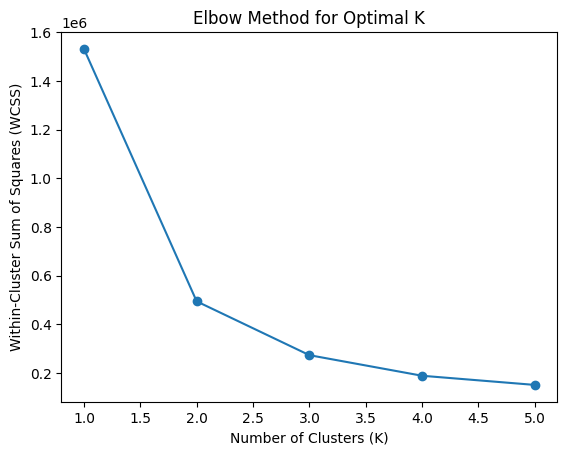

In [159]:
from sklearn.datasets import make_blobs

k_values = range(1, 6)

# List to store the within-cluster sum of squares (WCSS) for each K
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[['Age','Height','Weight']])
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

Optimized K value used to cluster Age, Height and Weight Attribute followed by 3D visualization

In [160]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X[['Age','Height','Weight']])
X['cluster_number'] = kmeans.labels_
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_number
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,4
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,3
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,3
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,3


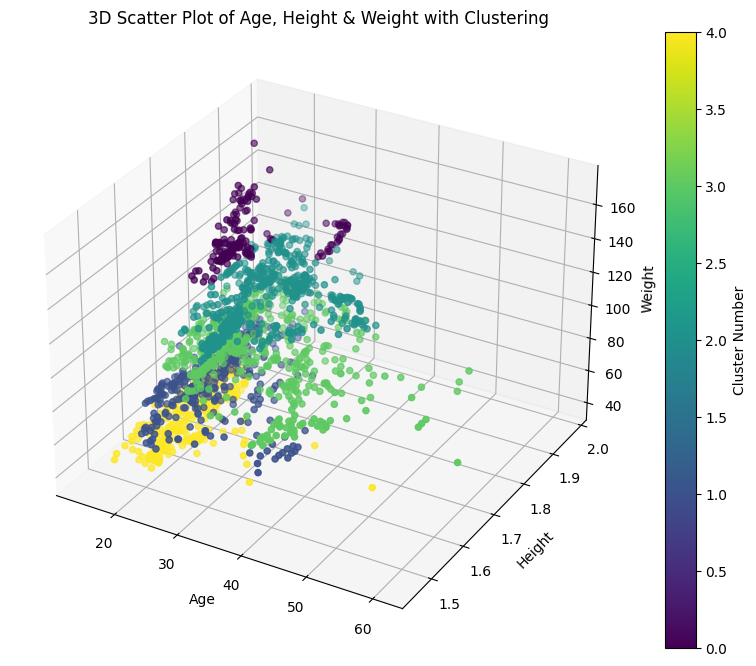

In [161]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['Age'], X['Height'], X['Weight'], c=X['cluster_number'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster Number')

plt.title('3D Scatter Plot of Age, Height & Weight with Clustering')
plt.show()

The dataset of obesity level estimation had only three continuous value columns namely : Age, Height, Weight. Age-Height, Height-Weight KMeans clustering was performed where three clusters were made, added to the dataset and then visualized. Later for Age-Weight, 5 different clustering with cluster number 1 to 5 was performed, visualized and added to dataset.

Elbow Method of clustering was deployed to find the optimal K value. That K value was used to perform KMeans clustering on Age-Height-Weight columns. It was later visualized in a 3D graph structure too.

The primary inference from this exploration will be the fact that available attributes for clustering are Age-Weight-Height and the optimal cluster number in our range considering within-cluster sum of squares is 5.